**Chain Programming (Method chaining):** [Mat Harrison](https://twitter.com/__mharrison__) propone una metodologia de escritura de codigo ligeramente diferente a la estrategia comun. Su propuesta se llama *chain programming* y conciste en escribir cada funcion que se aplica en un nueva linea y no todo de corrido en la misma linea. Una de las ventajas de esta forma de escritura es que es mas sencillo leer el codigo y seguirlo paso a paso. Vamos a aprovechs esta notebook para estudiar este estilo de escritura.

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
pd.options.display.min_rows = 20
import numpy as np
import missingno as msno

In [2]:
pd.__version__

'1.4.2'

## DataSet

In [3]:
autos = pd.read_csv('vehicles.csv')
autos.shape

<ipython-input-3-da2f2e3a1606>:1: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  autos = pd.read_csv('vehicles.csv')


(41144, 83)

In [4]:
autos.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
autos.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [6]:
# seleccionamos algunas columnas del dataset

cols =['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 'fuelCost08', 'make', 'model',
       'trany', 'range', 'createdOn', 'year']
autos[cols]

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
0,19,21,25,4.0,2.0,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
1,9,11,14,12.0,4.9,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
2,23,27,33,4.0,2.2,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
3,10,11,12,8.0,5.2,Rear-Wheel Drive,NaN,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
4,17,19,23,4.0,2.2,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
5,21,22,24,4.0,1.8,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
6,22,25,29,4.0,1.8,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
7,23,24,26,4.0,1.6,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
8,23,26,31,4.0,1.6,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
9,23,25,30,4.0,1.8,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1993


In [7]:
# revisamos el tipo de datos que hay en cada columna
autos[cols].dtypes

city08          int64
comb08          int64
highway08       int64
cylinders     float64
displ         float64
drive          object
eng_dscr       object
fuelCost08      int64
make           object
model          object
trany          object
range           int64
createdOn      object
year            int64
dtype: object

**nota:** Cuando una columna esta catalogada como `int64` eso (ademas del tipo de dato almacenado) indica que en esa columna no hay datos faltantes. Si en la columna hubiera al menos UN dato faltante, entonces PANDAS la clasificaria como `float64`. Por lo tanto una columna clasificada como `float64` puede tener:<br>

    -1 enteros y datos faltantes
    -2 flotantes y datos faltante
    -3 todos valores de punto flotante

<br>

Sobre `int64` y `float64`
El 64 simplemente se refiere a la memoria asignada para almacenar datos en cada celda; eso se refiere a la cantidad de dígitos que puede efectivamente almacenar cada “celda”

In [8]:
# evaluamos cuanto espacio de memoria utiliza cada una de las columnas
# los ordenamos de menor a mayor para ver que columnas utilizan mas espacio de menoria
autos[cols].memory_usage(deep = True).sort_values()

Index             128
city08         329152
comb08         329152
highway08      329152
cylinders      329152
displ          329152
fuelCost08     329152
range          329152
year           329152
eng_dscr      2135693
make          2606267
model         2813134
trany         2933276
drive         3028369
createdOn     3497240
dtype: int64

In [9]:
# memoria total ocupada por el dataset
autos[cols].memory_usage(deep = True).sum()

19647323

Son mas de 19 Megas

## int columns

In [10]:
(autos[cols]
.select_dtypes(int)
.describe()
)

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


In [11]:
# podriamos convertir algunas columnas en tipos de datos que ocupen menos memoria?
np.iinfo(np.int8) #iinfo brinda informacion sobre integers

iinfo(min=-128, max=127, dtype=int8)

Vemos que algunas columnas como Highway podriamos convertirlas en `int8` pero otras como comb08 no porque perderiamos precision en su valor.

In [12]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [13]:
# vamos a cambiar los tipos de datos de alguns columnas y luego analizar
(autos
[cols]
.astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16'})
.select_dtypes([int, 'int8'])
.describe()
)

,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000
mean,24.504667,2362.335942,0.793506,2001.535266
std,7.730364,654.981925,13.041592,11.142414
min,9.000000,500.000000,0.000000,1984.000000
25%,20.000000,1900.000000,0.000000,1991.000000
50%,24.000000,2350.000000,0.000000,2002.000000
75%,28.000000,2700.000000,0.000000,2011.000000
max,124.000000,7400.000000,370.000000,2020.000000


In [14]:
(autos
[cols]
.astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16', 'fuelCost08':'int16', 'range':'int16', 'year':'int16'})
.memory_usage(deep = True)
.sum()
)

18124995

Vemos que con estos cambios en los tipos de memoria es posible ahorrar un poco mas de un 10 % de memoria

## float columns

In [15]:
(autos
[cols]
.select_dtypes('float')
)

,cylinders,displ
0,4.0,2.0
1,12.0,4.9
2,4.0,2.2
3,8.0,5.2
4,4.0,2.2
5,4.0,1.8
6,4.0,1.8
7,4.0,1.6
8,4.0,1.6
9,4.0,1.8


In [16]:
# no tiene sentido representar el numero de cilindros como float
# por lo tanto los vamos a convertir a enteros int
(autos
.cylinders
.astype(int))

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

**No es posible convertir la columna `cylinders` en una columna de tipo `int` porque algunas celdas de esa columna tienen datos faltantes. Por lo tanto, si bien el numero de cilindros ES un numero entero, no vamos a poder convertirlo a menos que tomemos una decision sobre que hacer con esos datos faltantes.**<br>

Por otro lado, tener datos faltantes es un problema para la mayoria de los algoritmos de ML. Por lo tanto aunque no quisieramos convertir la columna, deberiamos tomar una decision (eliminarlos o imputarlos) porque de lo contrari no podriamos usar estos datos para entrenar un modelo de ML

In [17]:
# analizamos que cantidad de datos faltantes tenemos en la columna cylinders
(autos
.cylinders
.value_counts(dropna = False)
)

4.0     15938
6.0     14284
8.0      8801
5.0       771
12.0      626
3.0       279
NaN       206
10.0      170
2.0        59
16.0       10
Name: cylinders, dtype: int64

In [18]:
# hay datos faltantes en otras columnas?
# con este bloque podemos seleccionar las filas que tienen datos faltantes en la columna cylinder
(autos[cols]
.query('cylinders.isna()')) # el metodo query() de PANDAS esta muy bueno! pseudo SQL

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
7138,81,85,91,NaN,NaN,NaN,NaN,800,Nissan,Altra EV,NaN,90,Tue Jan 01 00:00:00 EST 2013,2000
7139,81,72,64,NaN,NaN,2-Wheel Drive,NaN,900,Toyota,RAV4 EV,NaN,88,Tue Jan 01 00:00:00 EST 2013,2000
8143,81,72,64,NaN,NaN,2-Wheel Drive,NaN,900,Toyota,RAV4 EV,NaN,88,Tue Jan 01 00:00:00 EST 2013,2001
8144,74,65,58,NaN,NaN,NaN,NaN,1000,Ford,Th!nk,NaN,29,Tue Jan 01 00:00:00 EST 2013,2001
8146,45,39,33,NaN,NaN,2-Wheel Drive,NaN,1700,Ford,Explorer USPS Electric,NaN,38,Tue Jan 01 00:00:00 EST 2013,2001
8147,84,75,66,NaN,NaN,NaN,NaN,900,Nissan,Hyper-Mini,NaN,33,Tue Jan 01 00:00:00 EST 2013,2001
9212,87,78,69,NaN,NaN,2-Wheel Drive,NaN,850,Toyota,RAV4 EV,NaN,95,Tue Jan 01 00:00:00 EST 2013,2002
9213,45,39,33,NaN,NaN,2-Wheel Drive,NaN,1700,Ford,Explorer USPS Electric,NaN,38,Tue Jan 01 00:00:00 EST 2013,2002
10329,87,78,69,NaN,NaN,2-Wheel Drive,NaN,850,Toyota,RAV4 EV,NaN,95,Tue Jan 01 00:00:00 EST 2013,2003
21413,22,24,28,NaN,NaN,4-Wheel Drive,NaN,1750,Subaru,RX Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985


<AxesSubplot:>

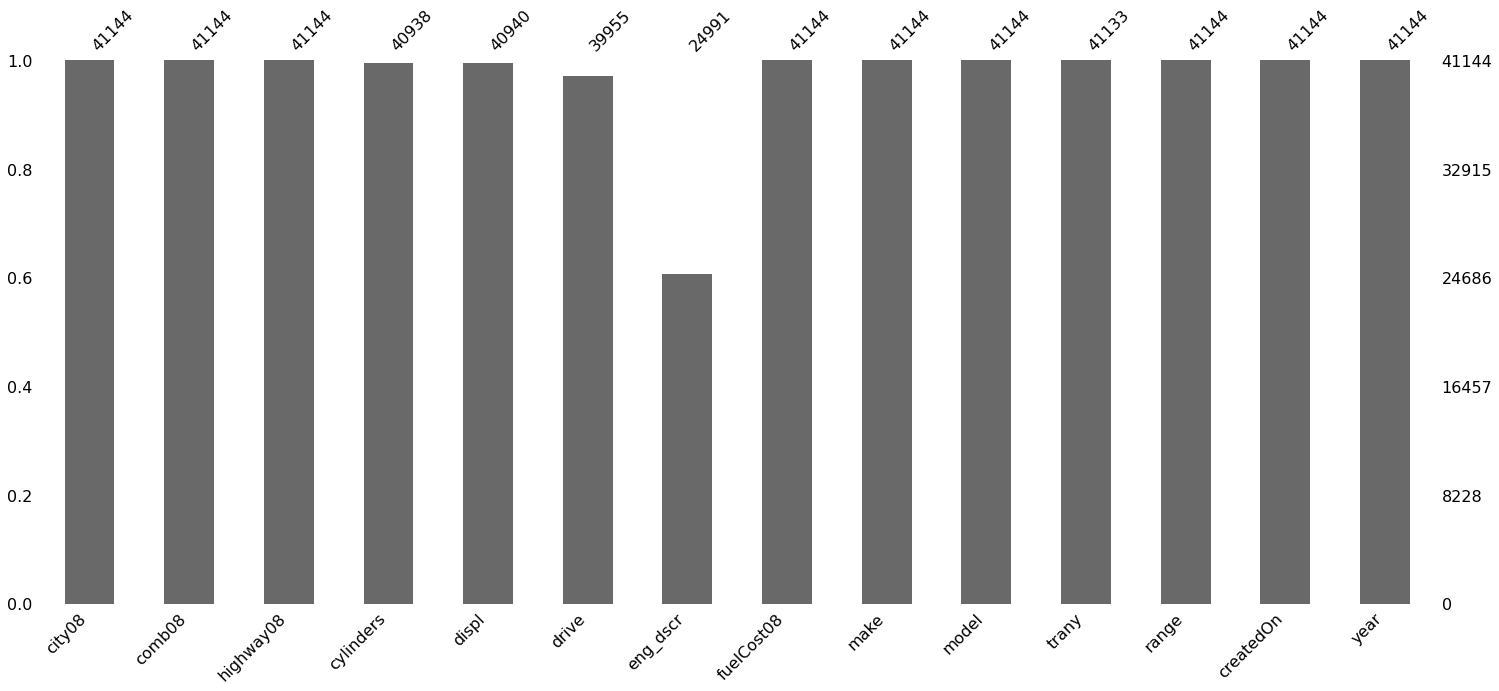

In [19]:
msno.bar(autos[cols])

Notar que tb hay datos faltantes en otras columnas

In [20]:
# vamos a cambiar los tipos de datos de alguns columnas y luego analizar
(autos
 [cols]
 .assign(cylinders = autos.cylinders.fillna(0).astype('int8'),
         displ = autos.displ.fillna(0))
 .astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16',
          'fuelCost08':'int16', 'range':'int16', 'year':'int16'})
 .describe()
)

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,5.688460,3.277904,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,1.797009,1.373415,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,0.000000,0.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,4.000000,2.200000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,6.000000,3.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,6.000000,4.300000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,16.000000,8.400000,7400.000000,370.000000,2020.000000


In [21]:
(autos
 [cols]
 .assign(cylinders = autos.cylinders.fillna(0).astype('int8'),
         displ = autos.displ.fillna(0).astype('float16'))
 .astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16',
          'fuelCost08':'int16', 'range':'int16', 'year':'int16'})
 )

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
0,19,21,25,4,2.000000,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
1,9,11,14,12,4.898438,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
2,23,27,33,4,2.199219,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
3,10,11,12,8,5.199219,Rear-Wheel Drive,NaN,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
5,21,22,24,4,1.799805,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
6,22,25,29,4,1.799805,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
7,23,24,26,4,1.599609,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
8,23,26,31,4,1.599609,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
9,23,25,30,4,1.799805,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1993


In [22]:
# Caunta memoria ocupan los datos despues de los cambios introducidos en el tipo de datos
(autos
 [cols]
 .assign(cylinders = autos.cylinders.fillna(0).astype('int8'),
         displ = autos.displ.fillna(0).astype('float16'))
 .astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16',
          'fuelCost08':'int16', 'range':'int16', 'year':'int16'})
 .memory_usage(deep = True)
 .sum()
)

17590123

## object columns

In [23]:
(autos
[cols]
.select_dtypes(object)
)

,drive,eng_dscr,make,model,trany,createdOn
0,Rear-Wheel Drive,(FFS),Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
1,Rear-Wheel Drive,(GUZZLER),Ferrari,Testarossa,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
2,Front-Wheel Drive,(FFS),Dodge,Charger,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
3,Rear-Wheel Drive,NaN,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
4,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",Subaru,Legacy AWD Turbo,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
5,Front-Wheel Drive,(FFS),Subaru,Loyale,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
6,Front-Wheel Drive,(FFS),Subaru,Loyale,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
7,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
8,Front-Wheel Drive,(FFS),Toyota,Corolla,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
9,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 4-spd,Tue Jan 01 00:00:00 EST 2013


In [24]:
# drive parece ser una variable categorica
(autos
 .drive
.value_counts(dropna = False))

Front-Wheel Drive             14236
Rear-Wheel Drive              13831
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                3015
4-Wheel Drive                  1460
NaN                            1189
2-Wheel Drive                   507
Part-time 4-Wheel Drive         258
Name: drive, dtype: int64

notar que tb tiene muchos datos faltantes y eso es algo que va a ser necesario resolver antes de utilizar estos datos en un proycto de ML.

In [25]:
# seguimos avanzando en la modificacion de los datos
(autos
 [cols]
 .assign(cylinders = autos.cylinders.fillna(0).astype('int8'),
         displ = autos.displ.fillna(0).astype('float16'),
         drive = autos.drive.fillna('Other').astype('category')      # completamos los NaN con 'Other'
        )
 .astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16',
          'fuelCost08':'int16', 'range':'int16', 'year':'int16', 'make':'category'})
 .memory_usage(deep = True)
 .sum()
)# previous memory usage: 17590123

12093275

El cambio sigue reduciendo el uso de memoria

In [26]:
# inspeccionamos la columna trany (transmition)
(autos
.trany
.value_counts(dropna = False))

Automatic 4-spd                     11047
Manual 5-spd                         8361
Automatic 3-spd                      3151
Automatic (S6)                       3106
Manual 6-spd                         2757
Automatic 5-spd                      2203
Automatic (S8)                       1665
Automatic 6-spd                      1619
Manual 4-spd                         1483
Automatic (S5)                        833
Automatic (variable gear ratios)      826
Automatic 7-spd                       724
Automatic 8-spd                       433
Automatic (AM-S7)                     424
Automatic (S7)                        327
Automatic 9-spd                       293
Automatic (AM7)                       245
Automatic (S4)                        233
Automatic (AV-S6)                     208
Automatic (A1)                        201
Automatic (AM6)                       151
Automatic (AV-S7)                     139
Automatic (S10)                       124
Automatic (AM-S6)                 

In [27]:
# vamos a eliminar la columna trany y dividir sus datos en otras dos columnas
(autos
 [cols]
 .assign(cylinders = autos.cylinders.fillna(0).astype('int8'),
         displ = autos.displ.fillna(0).astype('float16'),
         drive = autos.drive.fillna('Other').astype('category'),      # completamos los NaN con 'Other'
         automatic = autos.trany.str.contains('Auto'),                # True si es Auto False si no
         speeds = autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8') # le damos un valor cualquiera a los NaN
        )
 .astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16',
          'fuelCost08':'int16', 'range':'int16', 'year':'int16', 'make':'category'})
 .drop(columns = ['trany'])                                           # Eliminamos esta columna 
 .memory_usage(deep = True) 
 .sum()
)# previous memory usage: 12093275

10631047

Sige bajando la memoria necesaria para almacenar los datos.

## dates columns

In [28]:
# vamos a cambiar la columna createdOn usando la funcnio de PANDAS datetime
(autos
 [cols]
 .assign(cylinders = autos.cylinders.fillna(0).astype('int8'),
         displ = autos.displ.fillna(0).astype('float16'),
         drive = autos.drive.fillna('Other').astype('category'),      # completamos los NaN con 'Other'
         automatic = autos.trany.str.contains('Auto'),                # True si es Auto False si no
         speeds = autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'), # le damos un valor cualquiera a los NaN
         createdOn = pd.to_datetime(autos.createdOn).dt.tz_localize('America/New_York')
        )
 .astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16',
          'fuelCost08':'int16', 'range':'int16', 'year':'int16', 'make':'category'})
 .drop(columns = ['trany'])                                           # Eliminamos esta columna 
 .memory_usage(deep = True) 
 .sum()
)# previous memory usage: 10631047

c:\users\nico.-\appdata\local\programs\python\python38\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
c:\users\nico.-\appdata\local\programs\python\python38\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


7462959

Sigue bajando la demanda de memoria que tiene el almacenaje de los datos.

In [29]:
autos[cols].createdOn[:5]

0    Tue Jan 01 00:00:00 EST 2013
1    Tue Jan 01 00:00:00 EST 2013
2    Tue Jan 01 00:00:00 EST 2013
3    Tue Jan 01 00:00:00 EST 2013
4    Tue Jan 01 00:00:00 EST 2013
Name: createdOn, dtype: object

In [30]:
# si queremos evitar el error que sale mas arriba...
(autos
 [cols]
 .assign(cylinders = autos.cylinders.fillna(0).astype('int8'),
         displ = autos.displ.fillna(0).astype('float16'),
         drive = autos.drive.fillna('Other').astype('category'),      # completamos los NaN con 'Other'
         automatic = autos.trany.str.contains('Auto'),                # True si es Auto False si no
         speeds = autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'), # le damos un valor cualquiera a los NaN
         createdOn = pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00', ' EST' : '-05:00'}, regex = True))
        )
 .astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16',
          'fuelCost08':'int16', 'range':'int16', 'year':'int16', 'make':'category'})
 .drop(columns = ['trany'])                                           # Eliminamos esta columna 
 .memory_usage(deep = True) 
 .sum()
)# previous memory usage: 10631047

9437871

In [31]:
# inspeccionamos la columna ing_dscr
(autos
.eng_dscr
.value_counts(dropna = False)
)

NaN                                 16153
(FFS)                                8827
SIDI                                 5526
(FFS) CA model                        926
(FFS)      (MPFI)                     734
FFV                                   701
(FFS,TRBO)                            666
(350 V8) (FFS)                        411
(GUZZLER)  (FFS)                      366
SOHC                                  354
                                    ...  
B234L/R4 (FFS,TRBO)                     1
GUZZLER V8 FFS,TURBO                    1
4.6M FFS MPFI                           1
CNG FFS                                 1
POLICE FFS MPFI                         1
B308E5 FFS,TURBO                        1
5.4E-R FFS MPFI                         1
V-6 FFS                                 1
(GUZZLER)  (FFS)      (S-CHARGE)        1
R-ENG (FFS,TRBO)                        1
Name: eng_dscr, Length: 558, dtype: int64

Es una columna que parece haber sido completada a mano y por ese motivo es que hay tantos valores unicos.<br>
Este tipo de columnas no son valiosas en terminos de informacin porque es imposible encontrar un patron que pueda ser interpretado por un algoritmo de ML.<br>

Por lo tanto lo que vamos a hacer es trata de extraer algo de informacion y luego eliminar la columnas. Vamos a crear un nueva columna que se llame fss que sera True (o 1) si FSS estaba nombrado en la columna ing_dsc y sera False si no estaba nombrado. Es la unica informacion que vamos a poder sacar de una columna como esta.

In [32]:

(autos
 [cols]
 .assign(cylinders = autos.cylinders.fillna(0).astype('int8'),
         displ = autos.displ.fillna(0).astype('float16'),
         drive = autos.drive.fillna('Other').astype('category'),      # completamos los NaN con 'Other'
         automatic = autos.trany.str.contains('Auto'),                # True si es Auto False si no
         speeds = autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'), # le damos un valor cualquiera a los NaN
         createdOn = pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00', ' EST' : '-05:00'}, regex = True)),
         ffs = autos.eng_dscr.str.contains('FFS')
        )
 .astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16',
          'fuelCost08':'int16', 'range':'int16', 'year':'int16', 'make':'category'})
 .drop(columns = ['trany', 'eng_dscr'])                                # Eliminamos esta columna 
 .memory_usage(deep = True) 
 .sum()
)# previous memory usage: 10631047

8676214

Sige reduciendose la memoria necesaria paraalmacenar los datos.

## The glorious fuction

**La metodologia de trabajo que propone Mat Harrison permite comprimir todo el trabajo desde el principio de esta notebook en UNA SOLA FUNCION.**<br>

**De esta manera, si necesitamos volver a trabajar con estos datos no es necesario correr toda la notebook sino SOLO UNA FUNCION**


In [33]:
def tweak_autos(autos):
    cols =['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 'fuelCost08', 'make', 'model',
       'trany', 'range', 'createdOn', 'year']
 
    return(autos
     [cols]
     .assign(cylinders = autos.cylinders.fillna(0).astype('int8'),
             displ = autos.displ.fillna(0).astype('float16'),
             drive = autos.drive.fillna('Other').astype('category'),      # completamos los NaN con 'Other'
             automatic = autos.trany.str.contains('Auto'),                # True si es Auto False si no
             speeds = autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'), # le damos un valor cualquiera a los NaN
             createdOn = pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00', ' EST' : '-05:00'}, regex = True)),
             ffs = autos.eng_dscr.str.contains('FFS')
            )
     .astype({'highway08':'int8', 'city08':'int16', 'comb08':'int16',
              'fuelCost08':'int16', 'range':'int16', 'year':'int16', 'make':'category'})
     .drop(columns = ['trany', 'eng_dscr'])                                # Eliminamos esta columna 
    )

# aplicamos la funcion
autos2 = tweak_autos(autos)
autos2.memory_usage(deep = True).sum()

8676214

Finalmente conseguimos lo que queriamos que era obtener un dataset que tuviera la menor demanda de momoria posible.

In [34]:
autos2.head()

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.000000,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.898438,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.199219,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.199219,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,NaN
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True
